<a href="https://colab.research.google.com/github/Karuni001/Cognify_ML/blob/main/task1_Predicting__Restarant_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Loading Dataset
df = pd.read_csv("restaurant_data.csv")
print("Columns in dataset:", df.columns.tolist())
print("Initial rows:\n", df.head())

Columns in dataset: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
Initial rows:
    Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

In [5]:
# Renaming target column for ease
df.rename(columns={"Aggregate rating": "rate"}, inplace=True)

df["Average Cost for two"] = df["Average Cost for two"].astype(str).str.replace(",", "")
df["Average Cost for two"] = pd.to_numeric(df["Average Cost for two"], errors='coerce')

df.drop(["Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose",
         "Longitude", "Latitude", "Switch to order menu", "Currency"], axis=1, inplace=True)
df.dropna(inplace=True)

df["Has Table booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Has Online delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})
df["Is delivering now"] = df["Is delivering now"].map({"Yes": 1, "No": 0})

In [6]:
le = LabelEncoder()
cat_cols = ["City", "Cuisines", "Rating color", "Rating text"]
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop("rate", axis=1)
y = df["rate"]

In [7]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
#Predicting and evaluating
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nRMSE: {rmse:.2f}\nR2 Score: {r2:.2f}")


Model Evaluation:
RMSE: 0.18
R2 Score: 0.99


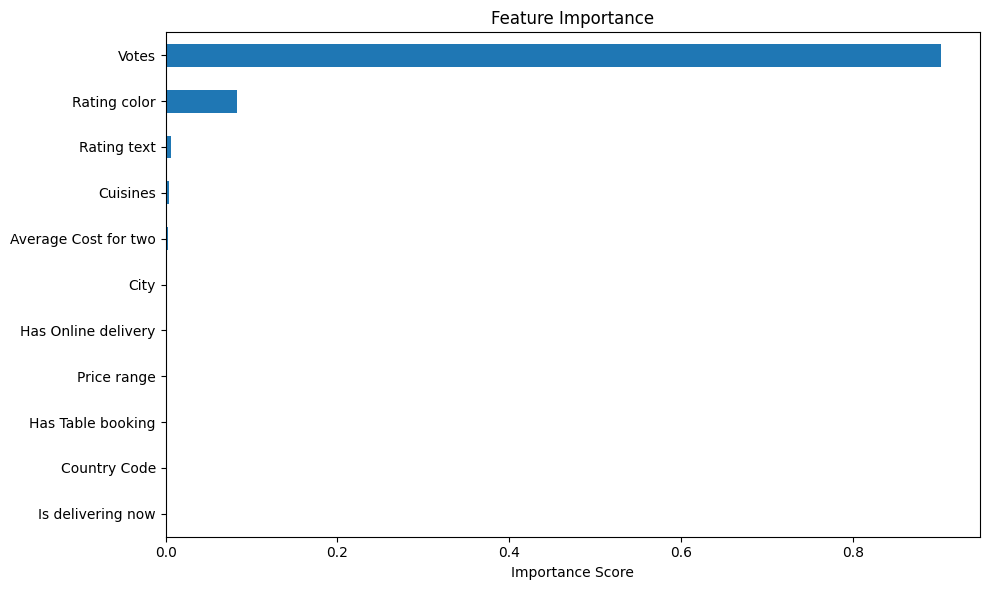

In [9]:
#Feature Importance Plot
plt.figure(figsize=(10, 6))
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()